# ADA Final Exam 2017

**Design the pockedex 2.0**

## Imports

In [300]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import statsmodels.formula.api as smf

sns.set_context('notebook')

## Question 1

### Part 1

#### Load Data


In [2]:
pokemons = pd.read_csv('pokemon.csv').rename(columns={'Class 1': 'Class_1', 'Class 2': 'Class_2'})
combats = pd.read_csv('combats.csv')

# Print head of each tables
display(pokemons.head(5))
display(combats.head(5))

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


#### Useful statistics

In [3]:
# Display generics statistic about the loaded data
display(pokemons.describe())
display(combats.describe())

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [4]:
nb_unique_class = pd.concat([pokemons.Class_1, pokemons.Class_2]).dropna().unique().size

print(f'There is {nb_unique_class} different classes.')

There is 18 different classes.


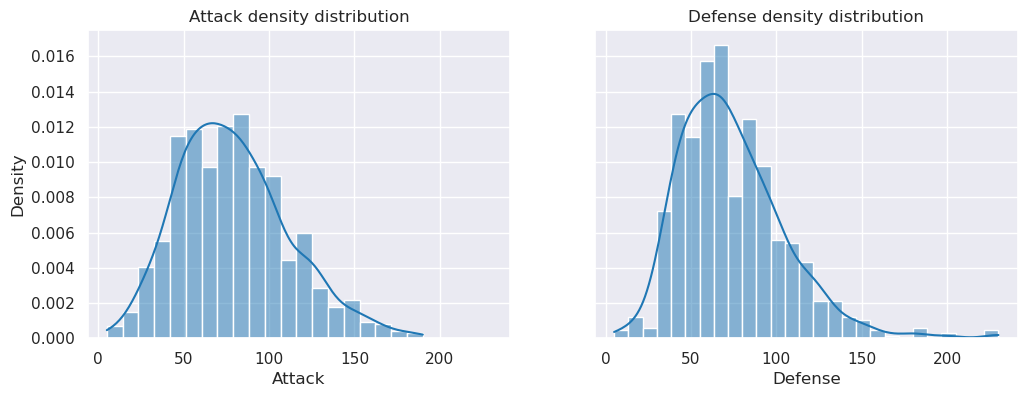

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(12, 4))
sns.histplot(data=pokemons, x='Attack', stat='density', ax=axs[0], kde=True)
axs[0].set_title('Attack density distribution')
sns.histplot(data=pokemons, x='Defense', stat='density', ax=axs[1], kde=True)
axs[1].set_title('Defense density distribution')
plt.show()

### Part 2

##### i.

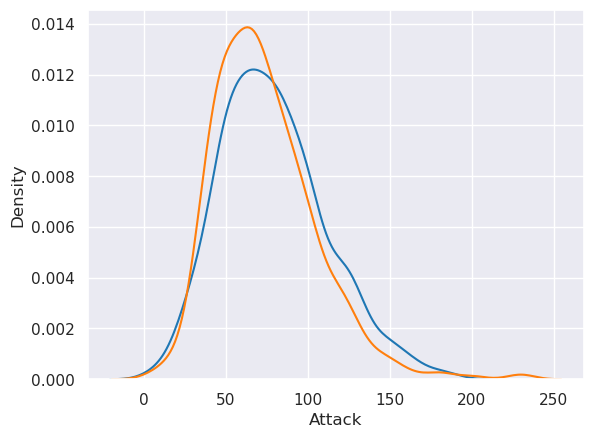

In [6]:
# Show the relation by overlapping distribution
sns.kdeplot(data=pokemons, x='Attack')
sns.kdeplot(data=pokemons, x='Defense')

plt.show()

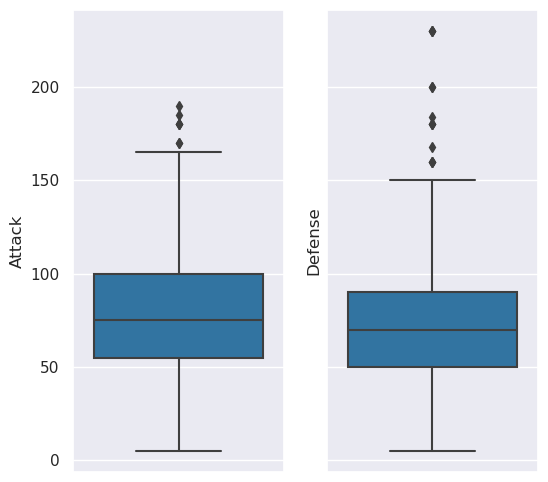

In [7]:
# Show the relation by using boxplots
fig, axs = plt.subplots(1, 2, figsize=(6, 6), sharey=True, sharex=True)
sns.boxplot(data=pokemons, y='Attack', ax=axs[0])
sns.boxplot(data=pokemons, y='Defense', ax=axs[1])
plt.show()

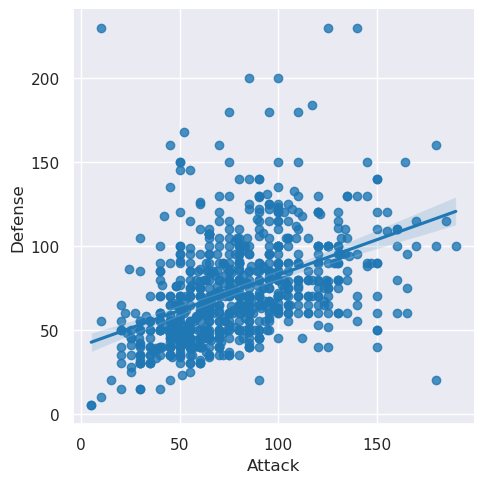

In [8]:
sns.lmplot(data=pokemons, x='Attack', y='Defense')
plt.show()

##### ii.

In [9]:
## Add the ratio to the dataframe
pokemons_with_attack_defense_ratio = pokemons.copy()
pokemons_with_attack_defense_ratio['ratio_attack_defense'] = pokemons_with_attack_defense_ratio.apply(
    func=lambda row: row['Attack'] / row['Defense'], axis=1)
ordered_attack_over_defense = pokemons_with_attack_defense_ratio[['Name', 'ratio_attack_defense']].sort_values(
    by='ratio_attack_defense', ascending=False)

three_highest_ratio: pd.Series = ordered_attack_over_defense.iloc[:3]['Name']
print('The three pokemon with the highest ratio of Attack over Defense are:')
for idx, entry in three_highest_ratio.items():
    print(f'\t - {entry}')

The three pokemon with the highest ratio of Attack over Defense are:
	 - DeoxysAttack Forme
	 - Carvanha
	 - Mega Beedrill


##### iii.

In [10]:
three_lowest_ratio = ordered_attack_over_defense.iloc[-3:]['Name']
print('The three pokemon with the lowest ratio of Attack over Defense are:')
for idx, entry in three_lowest_ratio.items():
    print(f'\t - {entry}')

The three pokemon with the lowest ratio of Attack over Defense are:
	 - Bronzor
	 - Magikarp
	 - Shuckle


##### iv.

In [11]:
combats_winners = combats.groupby('Winner')
nb_victory = combats_winners['Winner'].count().rename('nb_victory')
pokemons_with_victories = pokemons[['pid', 'Name']].merge(nb_victory, how='inner', left_on='pid', right_index=True)

ordered_pokemon_victory = pokemons_with_victories[['Name', 'nb_victory']].sort_values(by='nb_victory', ascending=False)
print('The ten pokemon that have won the most battle are:')
for idx, entry in ordered_pokemon_victory[:10]['Name'].items():
    print(f'\t - {entry}')

The ten pokemon that have won the most battle are:
	 - Mewtwo
	 - Aerodactyl
	 - Infernape
	 - Jirachi
	 - Deoxys Speed Forme
	 - Slaking
	 - Murkrow
	 - Mega Absol
	 - Mega Houndoom
	 - Mega Aerodactyl


### Part 3

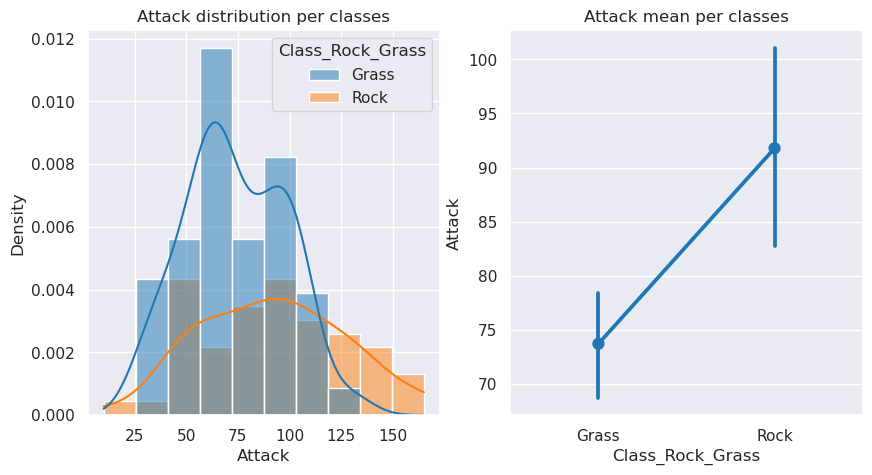

In [12]:
# Get the data
grass_rock_pokemons = pokemons.query(
    '(Class_1 == "Grass" and Class_2 != "Rock") or (Class_1 == "Rock" and Class_2 != "Grass") or (Class_1 != "Grass" and Class_2 == "Rock") or (Class_1 != "Rock" and Class_2 == "Grass")').copy()

grass_rock_pokemons['Class_Rock_Grass'] = grass_rock_pokemons.apply(
    lambda row: "Grass" if row['Class_1'] == "Grass" or row['Class_2'] == "Grass" else "Rock", axis=1)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), )

# Plot the distribution of both
sns.histplot(data=grass_rock_pokemons, x='Attack', stat='density', hue='Class_Rock_Grass', bins=10, kde=True, ax=axs[0])
axs[0].set_title('Attack distribution per classes')

# Plot the mean 
sns.pointplot(x="Class_Rock_Grass", y="Attack", data=grass_rock_pokemons, errorbar=('ci', 95), ax=axs[1])
axs[1].set_title('Attack mean per classes')

plt.show()

In [13]:
# Split 'Grass' and 'Rock' Pokémon
grass_pokemons = grass_rock_pokemons.query('Class_Rock_Grass == "Grass"').Attack.copy()
rock_pokemons = grass_rock_pokemons.query('Class_Rock_Grass == "Rock"').Attack.copy()

# Compute the means and standard deviation of both categories
[mean_grass_attack, std_grass_attack] = grass_pokemons.agg(['mean', 'std'])
[mean_rock_attack, std_rock_attack] = rock_pokemons.agg(['mean', 'std'])

# Calculate confidence interval using normal distribution with scipy library 
cf_mean_grass_attack_inf, cf_mean_grass_attack_sup = scp.norm.interval(confidence=0.95, loc=mean_grass_attack,
                                                                       scale=std_grass_attack / np.sqrt(
                                                                           len(grass_pokemons)))
cf_mean_rock_attack_inf, cf_mean_rock_attack_sup = scp.norm.interval(confidence=0.95, loc=mean_rock_attack,
                                                                     scale=std_rock_attack / np.sqrt(
                                                                         len(grass_pokemons)))

ttest = scp.ttest_ind(grass_pokemons, rock_pokemons, equal_var=False)

print(
    f'\tThe mean of grass class attack is {mean_grass_attack:.3f}, with a 95% confidence interval of [{cf_mean_grass_attack_inf:.3f}, {cf_mean_grass_attack_sup:.3f}]')
print(
    f'\tThe mean of the rock class attack is {mean_rock_attack:.3f}, with a 95% confidence interval of [{cf_mean_rock_attack_inf:.3f}, {cf_mean_rock_attack_sup:.3f}]')

print('\nt-test result:\n==========================')
print(f'\tt-statistic: {ttest[0]:.3f},\n'
      f'\tp-value: {ttest[1]:.5f}')

	The mean of grass class attack is 73.731, with a 95% confidence interval of [68.817, 78.645]
	The mean of the rock class attack is 91.786, with a 95% confidence interval of [84.712, 98.859]

t-test result:
	t-statistic: -3.417,
	p-value: 0.00096


As we can see on the graph, the 95% confidence intervals of both means don't overlap, which means that the difference in means is statistically significant.

To ensure the correctness, both intervals have been calculated, along with the p-value of the t-test statistic. The p-value $0.00096 < 0.05$, which mean that both means being different is statistically significant.

## Question 2

#### Part 1

In [133]:
# Bring data from pokémon matrix to have all the featurs in the 
combats_fst_with_info = combats.merge(pokemons, left_on='First_pokemon', right_on='pid')
combats_snd_with_info = combats.merge(pokemons, left_on='Second_pokemon', right_on='pid')
combats_with_info = combats_fst_with_info.join(combats_snd_with_info, how='inner', lsuffix='_first', rsuffix='_second')

# 1 If first is the winner, 0 if second is the winner
combats_with_info['Winner'] = combats_with_info.apply(
    lambda row: 1 if row['First_pokemon_first'] == row['Winner_first'] else 0, axis=1)

# keep only interesting columns = 
combats_with_info.drop(
    ['First_pokemon_first', 'Second_pokemon_first', 'First_pokemon_second', 'Second_pokemon_second', 'Winner_first',
     'Winner_second', 'pid_first', 'pid_second', 'Name_first', 'Name_second'], axis=1, inplace=True)

combats_with_info_onehot = pd.get_dummies(combats_with_info, columns=['Class_1_first', 'Class_2_first'], dtype=int,
                                          prefix='onehot_first', prefix_sep='-')
combats_with_info_onehot = pd.get_dummies(combats_with_info_onehot, columns=['Class_1_second', 'Class_2_second'],
                                          dtype=int, prefix='onehot_second', prefix_sep='-')

# Convert bool type in int
combats_with_info_onehot = combats_with_info_onehot.astype({'Legendary_first': int, 'Legendary_second': int})

#
X = combats_with_info_onehot.drop('Winner', axis=1).copy()
y = combats_with_info_onehot['Winner'].copy()

print("The feature matrix is:")
display(X.head())
print("The labels vector is:")
display(y.head())

The feature matrix is:


,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Legendary_first,HP_second,Attack_second,Defense_second,...,onehot_second-Ghost,onehot_second-Grass,onehot_second-Ground,onehot_second-Ice,onehot_second-Normal,onehot_second-Poison,onehot_second-Psychic,onehot_second-Rock,onehot_second-Steel,onehot_second-Water
0,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
1,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
2,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
3,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0
4,50,64,50,45,50,41,0,70,70,40,...,0,0,0,0,0,0,0,0,0,0


The labels vector is:


0    0
1    0
2    1
3    0
4    0
Name: Winner, dtype: int64

### Part 2

For categorical features like *Legendary*, I simply converted it to an int, to use a 1 for True, and a 0 for False.

For categorical data like the name, it seemed to me like it wasn't relevant to predict the winner, so I removed it from the training data.

And finally for the Pokémon classes, I used a onehot encoding of the feature. A 1 telling that the pokémon was part of this class, and a 0 to tell it wasn't.

### Part 3

In [188]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Let's normalize the data by assuming it is normally distributed
X_std = (X - X.mean()) / X.std()
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()

In [170]:
n_estimators = [10, 25, 50, 100]
max_depths = [2, 4, 10]
predictions = []
for n_estimator in n_estimators:
    for max_depth in max_depths:
        random_forest = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth)
        random_forest.fit(X_train_std, y_train)
        y_pred = random_forest.predict(X_test_std)
        predictions.append(y_pred)


In [171]:
print("Prediction vectors for each of the different models")
display(predictions)

Prediction vectors for each of the different models


[array([1, 1, 0, ..., 1, 0, 0]),
 array([1, 1, 0, ..., 1, 0, 0]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 0, 0]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1]),
 array([1, 1, 0, ..., 1, 0, 0]),
 array([1, 1, 0, ..., 1, 0, 1]),
 array([1, 1, 0, ..., 1, 1, 1])]

### Part 4

In [184]:
metrics = [(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)) for y_pred in predictions]

metrics_dataframe = pd.DataFrame(metrics, columns=['Accuracy', 'F1-score'])

print("Metrics calculated for the different predictions:"
      "\n=================================================")
for idx, accuracy, f1 in metrics_dataframe.itertuples():
    print(f"iter_nb {idx} - n_estimator {n_estimators[idx // 3]} - max_depth {max_depths[idx % 3]}")
    print(f"\t - Accuracy: {accuracy}\n"
          f"\t - F1-Score: {f1}")


Metrics calculated for the different predictions:
iter_nb 0 - n_estimator 10 - max_depth 2
	 - Accuracy: 0.6922
	 - F1-Score: 0.6461255461025522
iter_nb 1 - n_estimator 10 - max_depth 4
	 - Accuracy: 0.6994
	 - F1-Score: 0.6447648310092177
iter_nb 2 - n_estimator 10 - max_depth 10
	 - Accuracy: 0.7214
	 - F1-Score: 0.6956521739130436
iter_nb 3 - n_estimator 25 - max_depth 2
	 - Accuracy: 0.7224
	 - F1-Score: 0.6781076066790352
iter_nb 4 - n_estimator 25 - max_depth 4
	 - Accuracy: 0.7258
	 - F1-Score: 0.6971504307488404
iter_nb 5 - n_estimator 25 - max_depth 10
	 - Accuracy: 0.727
	 - F1-Score: 0.6938775510204083
iter_nb 6 - n_estimator 50 - max_depth 2
	 - Accuracy: 0.705
	 - F1-Score: 0.648558494162497
iter_nb 7 - n_estimator 50 - max_depth 4
	 - Accuracy: 0.723
	 - F1-Score: 0.6840063883185032
iter_nb 8 - n_estimator 50 - max_depth 10
	 - Accuracy: 0.7256
	 - F1-Score: 0.6961913197519929
iter_nb 9 - n_estimator 100 - max_depth 2
	 - Accuracy: 0.7014
	 - F1-Score: 0.6441001191895113


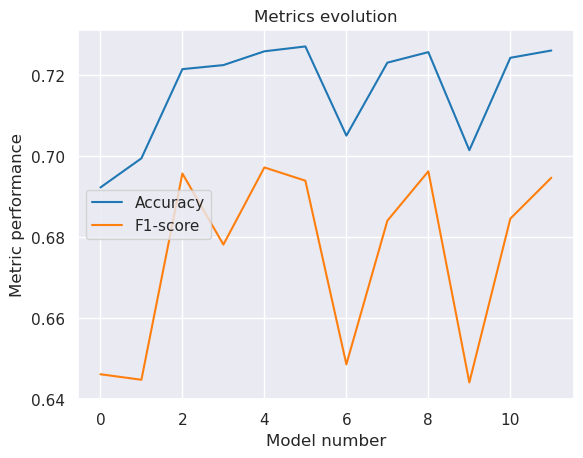

In [185]:
metrics_dataframe.plot()
plt.title('Metrics evolution')
plt.xlabel('Model number')
plt.ylabel('Metric performance')
plt.show()

In [186]:
# Max value over each metrics
metrics_dataframe.agg(lambda col: np.argmax(col))

Accuracy    5
F1-score    4
dtype: int64

In [187]:
# distribution of y_train
fst_winn_nb = y_train.sum()
snd_winn_nb = len(y_train) - fst_winn_nb
fst_winn_nb / len(y_train), snd_winn_nb / len(y_train)

(0.4719555555555556, 0.5280444444444444)

As we can see, our data is relatively well-balanced, almost as much first opponents win as seconds do win. So in this case, the best measure to use would be the accuracy or the f1-score. By looking at the curve, we can see that the best option when looking at accuracy and f1-score combined, would be to have:
- n_estimator = 25 
- max_depth = 4

### Part 5

Yes, it might not be completely accurate, as we leave out 10% of the dataset for training, and we test only on 10% of the data. A preferred approach to choose hyperparameter, is to use cross validation. This way we use 100% of the data as train data, and 100% of the data as test data as well. So we are more robust to choose the hyperparameter correctly.

### Part 6

In [192]:
cross_val_metrics = []
for n_estimator in n_estimators:
    for max_depth in max_depths:
        random_forest = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth)
        cross_val_metrics.append((cross_val_score(random_forest, X_std, y, cv=10, scoring='accuracy'),
                                  cross_val_score(random_forest, X_std, y, cv=10, scoring='f1')))

In [284]:
cross_val_metrics_dataframe = pd.DataFrame(cross_val_metrics, columns=['Accuracy', 'F1-score'])
cross_val_metrics_dataframe_agg = cross_val_metrics_dataframe.copy()
cross_val_metrics_dataframe_agg[['Accuracy_mean','F1-score_mean']] = cross_val_metrics_dataframe.apply(lambda col: [e.mean() for e in col])
cross_val_metrics_dataframe_agg[['Accuracy_std','F1-score_std']] = cross_val_metrics_dataframe.apply(lambda col: [e.std(ddof=0) for e in col])
cross_val_metrics_dataframe_agg

,Accuracy,F1-score,Accuracy_mean,F1-score_mean,Accuracy_std,F1-score_std
0,"[0.7282, 0.6698, 0.6608, 0.6704, 0.7058, 0.638...","[0.5801445009365801, 0.5709644670050762, 0.700...",0.68912,0.617952,0.026756,0.061731
1,"[0.7228, 0.6546, 0.6892, 0.6904, 0.7078, 0.714...","[0.6038403233956544, 0.6164498531263114, 0.672...",0.70074,0.645960,0.018220,0.026566
2,"[0.7116, 0.6382, 0.6768, 0.6898, 0.6646, 0.665...","[0.6247256766642283, 0.6158497084862881, 0.659...",0.67336,0.632311,0.027395,0.037601
3,"[0.717, 0.6554, 0.7098, 0.643, 0.7008, 0.7412,...","[0.6366427840327534, 0.5909607086077674, 0.650...",0.70058,0.643150,0.028525,0.025626
4,"[0.7388, 0.6736, 0.6936, 0.7304, 0.7118, 0.723...","[0.6762554851292053, 0.6237712243074174, 0.690...",0.70954,0.672599,0.018926,0.022551
5,"[0.6972, 0.6452, 0.6586, 0.6856, 0.6556, 0.655...","[0.6128458999746128, 0.603023758099352, 0.6656...",0.67142,0.637199,0.025273,0.032736
6,"[0.71, 0.6542, 0.6864, 0.7104, 0.7132, 0.7078,...","[0.5805929919137466, 0.5992526856609062, 0.627...",0.69934,0.642275,0.017268,0.049512
7,"[0.7368, 0.6698, 0.7068, 0.7342, 0.7032, 0.735...","[0.6586224233283057, 0.6206741573033707, 0.689...",0.71128,0.673230,0.022339,0.021657
8,"[0.699, 0.6428, 0.6656, 0.6876, 0.661, 0.667, ...","[0.613578356304237, 0.6157517899761338, 0.6642...",0.67374,0.638851,0.025338,0.030134
9,"[0.706, 0.651, 0.703, 0.7084, 0.7116, 0.718, 0...","[0.6263993751627182, 0.6020240056483879, 0.687...",0.69926,0.658434,0.019365,0.035118


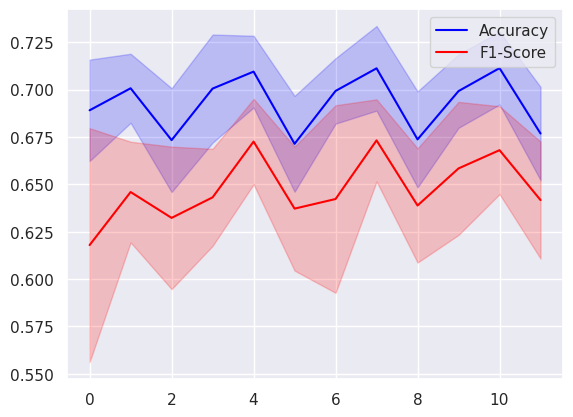

In [297]:
index = np.arange(len(cross_val_metrics_dataframe_agg))
plt.plot(index, cross_val_metrics_dataframe_agg['Accuracy_mean'], 'b-', label='Accuracy')
plt.fill_between(index, cross_val_metrics_dataframe_agg['Accuracy_mean'] - cross_val_metrics_dataframe_agg['Accuracy_std'], cross_val_metrics_dataframe_agg['Accuracy_mean'] + cross_val_metrics_dataframe_agg['Accuracy_std'], color='b', alpha=0.2)
plt.plot(index, cross_val_metrics_dataframe_agg['F1-score_mean'], 'r-', label='F1-Score')
plt.fill_between(index, cross_val_metrics_dataframe_agg['F1-score_mean'] - cross_val_metrics_dataframe_agg['F1-score_std'], cross_val_metrics_dataframe_agg['F1-score_mean'] + cross_val_metrics_dataframe_agg['F1-score_std'], color='r', alpha=0.2)
plt.legend()
plt.show()

In [272]:
# prepare the dataframe to display it with seaborn as line-plot along with the error bars

cross_val_metrics_dataframe_explode = cross_val_metrics_dataframe.copy()
cross_val_metrics_dataframe_explode['idx'] = np.arange(len(cross_val_metrics_dataframe))
cross_val_metrics_dataframe_explode = cross_val_metrics_dataframe_explode.explode(['Accuracy', 'F1-score'])
cross_val_metrics_dataframe_explode_acc = cross_val_metrics_dataframe_explode[['Accuracy', 'idx']].rename(columns={'Accuracy': 'value'})
cross_val_metrics_dataframe_explode_f1 = cross_val_metrics_dataframe_explode[['F1-score', 'idx']].rename(columns={'F1-score': 'value'})
cross_val_metrics_dataframe_explode_acc['measure'] = pd.Series(['Accuracy' for i in range(len(cross_val_metrics_dataframe_explode))])
cross_val_metrics_dataframe_explode_f1['measure'] = pd.Series(['F1-score' for i in range(len(cross_val_metrics_dataframe_explode))])

#
cross_val_metrics_dataframe_reshaped = pd.concat([cross_val_metrics_dataframe_explode_acc, cross_val_metrics_dataframe_explode_f1])

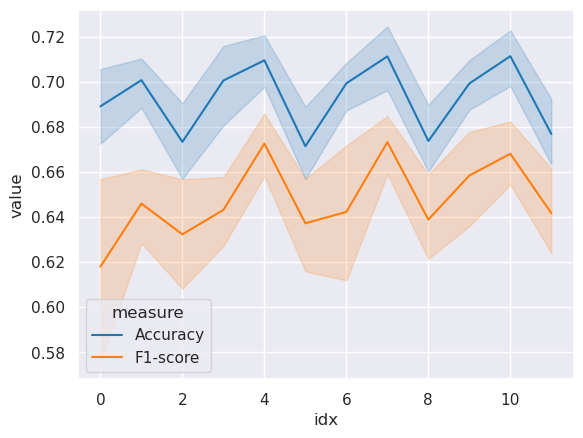

In [377]:
sns.lineplot(data=cross_val_metrics_dataframe_reshaped, x='idx', y='value', hue='measure')
plt.show()

In [298]:
cross_val_metrics_dataframe_agg[['Accuracy_mean', 'F1-score_mean']].agg(lambda col: np.argmax(col))

Accuracy_mean    10
F1-score_mean     7
dtype: int64

This time by looking at the best results, we can see that the overall best, is for the model 7, which has:
- n_estimator = 50 
- max_depth = 4

### Part 7

To answer this question, we can perform a simple linear classification, and observe the coefficient of each features

In [299]:
combats_with_info

,Class_1_first,Class_2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Legendary_first,Class_1_second,Class_2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Legendary_second,Winner
0,Rock,Ground,50,64,50,45,50,41,False,Grass,Dark,70,70,40,60,40,60,False,0
1,Rock,Ground,50,64,50,45,50,41,False,Grass,Dark,70,70,40,60,40,60,False,0
2,Rock,Ground,50,64,50,45,50,41,False,Grass,Dark,70,70,40,60,40,60,False,1
3,Rock,Ground,50,64,50,45,50,41,False,Grass,Dark,70,70,40,60,40,60,False,0
4,Rock,Ground,50,64,50,45,50,41,False,Grass,Dark,70,70,40,60,40,60,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Dragon,NaN,45,50,35,55,75,40,False,Electric,Steel,70,70,115,130,90,60,False,1
49996,Dragon,NaN,45,50,35,55,75,40,False,Electric,Steel,70,70,115,130,90,60,False,0
49997,Dragon,NaN,45,50,35,55,75,40,False,Electric,Steel,70,70,115,130,90,60,False,0
49998,Dragon,NaN,45,50,35,55,75,40,False,Electric,Steel,70,70,115,130,90,60,False,1


In [324]:
combats_with_info_std = combats_with_info.copy().rename(columns={'Sp. Atk_first':'Sp_Atk_first', 'Sp. Atk_second':'Sp_Atk_second', 'Sp. Def_first':'Sp_Def_first', 'Sp. Def_second':'Sp_Def_second'})
columns_to_std = ['HP_first', 'Attack_first', 'Defense_first', 'Sp_Atk_first', 'Sp_Def_first', 'Speed_first',
                  'HP_second', 'Attack_second', 'Defense_second', 'Sp_Atk_second', 'Sp_Def_second', 'Speed_second']

combats_with_info_std[columns_to_std] = (combats_with_info_std[columns_to_std] - combats_with_info_std[columns_to_std].mean()) / combats_with_info_std[columns_to_std].std()

mod = smf.logit(formula=
        'Winner ~ C(Class_1_first) + C(Class_2_first) + HP_first + Attack_first + Defense_first + Sp_Atk_first + Sp_Def_first + Speed_first + C(Legendary_first) + C(Class_1_second) + C(Class_2_second) + HP_second + Attack_second + Defense_second + Sp_Atk_second + Sp_Def_second + Speed_second + C(Legendary_second)', data=combats_with_info_std)

np.random.seed(2)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.554681
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                14061
Model:                          Logit   Df Residuals:                    13978
Method:                           MLE   Df Model:                           82
Date:                Fri, 12 Jan 2024   Pseudo R-squ.:                  0.1998
Time:                        10:32:21   Log-Likelihood:                -7799.4
converged:                       True   LL-Null:                       -9746.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.2310      0.367     -0.629      0.

In [368]:
# feature names
variables = res.params.index

# coefficients
coefficients = res.params.values

# p-values
p_values = res.pvalues

# standard errors
standard_errors = res.bse.values

# Sort them
coeff, var_name, std_err, p_val = zip(*sorted(zip(coefficients[1:], variables[1:], standard_errors[1:], p_values[1:]), reverse=True))

In [382]:
filtered_df = pd.DataFrame({'Name': variables, 'coef': coefficients, 'p_val': p_values, 'std_error': standard_errors}).sort_values(by='coef', ascending=False).query('p_val < 0.05')

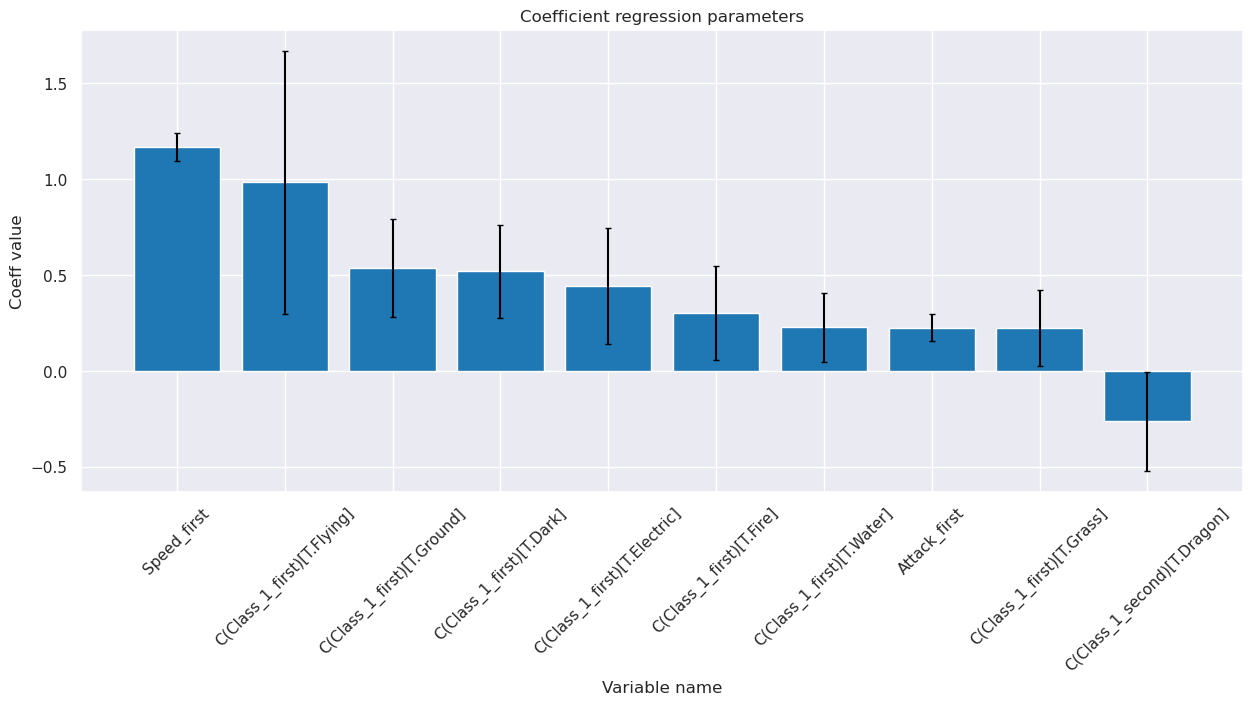

In [384]:
plt.figure(figsize=(15, 6))

plt.bar(filtered_df.Name[:10], filtered_df.coef[:10], yerr=2*filtered_df.std_error[:10], capsize=2)
plt.xticks(rotation=45)
plt.title('Coefficient regression parameters')
plt.xlabel('Variable name')
plt.ylabel('Coeff value')
plt.show()

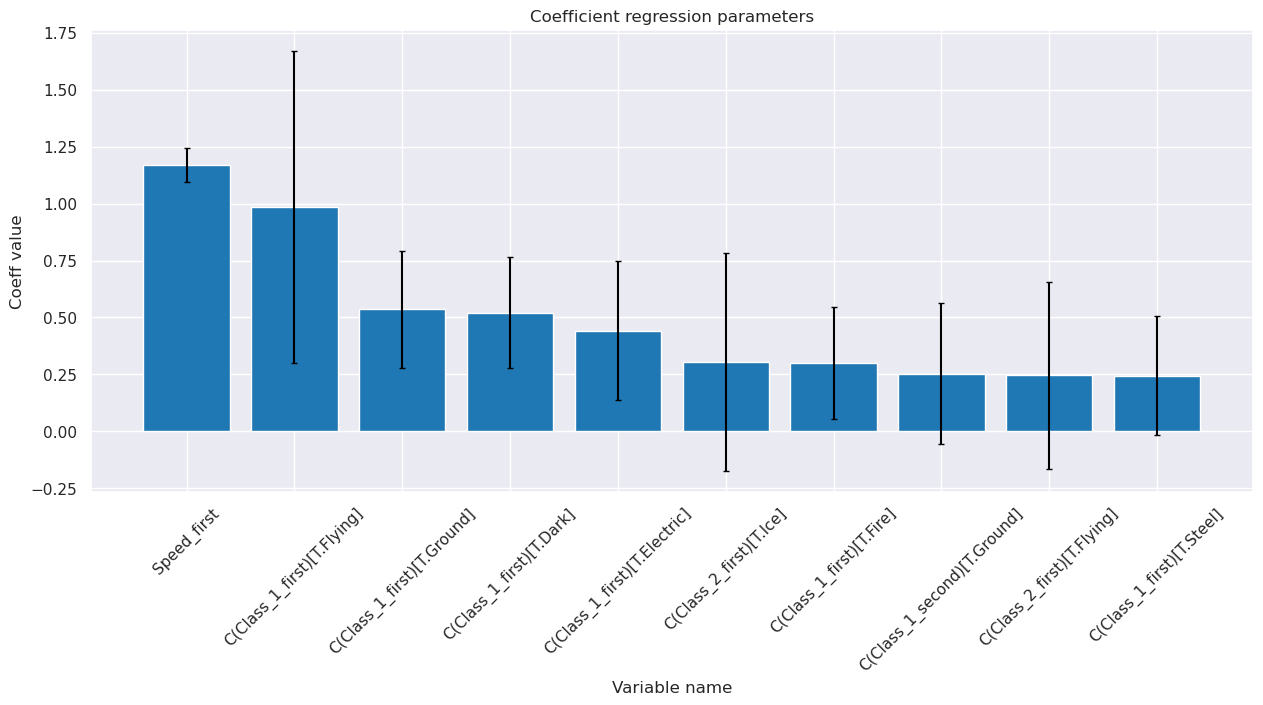

In [374]:
plt.figure(figsize=(15, 6))

plt.bar(var_name[:10], coeff[:10], yerr=2*np.array(std_err[:10]), capsize=2)
plt.xticks(rotation=45)
plt.title('Coefficient regression parameters')
plt.xlabel('Variable name')
plt.ylabel('Coeff value')
plt.show()